# Assignment 1

First, imports.

In [1]:
import os
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
from numpy import linalg as LA

Next, define global parameters at the top.

In [2]:
path_to_anomalies = "Datasets/Datasets/Experiments_with_Anomalies"
path_to_normal = "Datasets/Datasets/Normal_Experiments"

file_name_normal = "merged_exp_normal.csv"
file_name_anomalies = "merged_exp_contains_anomalies.csv"

flag_regen_merged_files = True                                     # regenerate merged csv files? 

Some helper functions for code that gets reused.

In [3]:
# helper function to load all the files in a directory to a pandas dataframe (operation is the same for Q1 and Q2)
def load_df_from_directory(fp):
    list_of_files = os.listdir(fp)                     # get list of files in directory
    print("Found {} files in {}\n".format(str(len(list_of_files)), path_to_normal))
    
    data = []                                                      # empty list to store data

    for file in list_of_files:
        if ".csv" in file:                                         # made sure it's a csv
            df_this_chunk = pd.read_csv(fp + '/' + file)
            df_this_chunk["experiment"] = file[:-4]                # add column to df with experiment label ([:-4] strips .csv)
            data.append(df_this_chunk)                             # add dataframe to list of dfs

    return pd.concat(data)                                         # concatenate list into a single dataframe
                                                                   # note that this is much more efficient that
                                                                   # concatenating on each loop

# helper function to filter a dataframe for Sds_armed == 1 (operation is the same for Q1 and Q2)
def filter_df_for_sds_armed(df):
    return df[df["Sds_Armed"] == 1]           # select only rows where Sds_Armed == 1

## Question 1
_Filter all "Normal Experiments" by taking into account only active samples `SDS_Armed=1`, and then merge them in a new file named as `merged_exp_normal.csv`.  Write a script that performs this task and then indicate the number of examples of the merged dataset._

First, load all the normal experiment data into a single pandas dataframe.

In [4]:
df_normal_data = load_df_from_directory(path_to_normal)

r, c = df_normal_data.shape
print("Dataset has {} rows and {} columns.\n".format(r,c))
        
df_normal_data.head()                                                 # show dataset head

Found 68 files in Datasets/Datasets/Normal_Experiments

Dataset has 1074858 rows and 11 columns.



X1        X2        X3        X4       X5       X6      X7       X8  \
0  0.006286  0.011072  0.088714  0.036855  0.12677  0.22329  1.7891  0.74325   
1  0.008937  0.015274  0.119970  0.051323  0.18024  0.30803  2.4193  1.03500   
2  0.012156  0.019694  0.150640  0.064529  0.24514  0.39717  3.0379  1.30130   
3  0.015202  0.024273  0.179940  0.075763  0.30658  0.48950  3.6288  1.52790   
4  0.017572  0.028237  0.208750  0.087763  0.30470  0.48138  3.6888  1.55960   

   Sds_Armed  Anomaly_Tag            experiment  
0          0            0  HEAT_ID_01_ALARM_OUT  
1          0            0  HEAT_ID_01_ALARM_OUT  
2          0            0  HEAT_ID_01_ALARM_OUT  
3          0            0  HEAT_ID_01_ALARM_OUT  
4          0            0  HEAT_ID_01_ALARM_OUT

Now, select the rows where `sds_armed = 1`, and save to `merged_normal.csv`.

In [5]:
df_normal_data_filtered = filter_df_for_sds_armed(df_normal_data)        # select only rows where Sds_Armed == 1

if flag_regen_merged_files:
    df_normal_data_filtered.to_csv(file_name_normal)
    print("Dataframe saved to " + file_name_normal + "\n")

r, c = df_normal_data_filtered.shape
print("There are {} filtered samples.".format(r))

Dataframe saved to merged_exp_normal.csv

There are 152356 filtered samples.


## Question 2
_Filter all "Experiments with Anomalies" by taking into account only active samples `SDS_Armed=1` similar to the requirements in Question 1, and then, merge them in a new file named as `merged_exp_contains_anomalies.csv`.  Write a script that performs this task and then indicate the number of examples of the merged dataset._

First, load all the experiment data with anomalies into a single pandas dataframe.

In [6]:
df_anomalies_data = load_df_from_directory(path_to_anomalies)

r, c = df_anomalies_data.shape
print("Dataset has {} rows and {} columns.\n".format(r,c))
        
df_anomalies_data.head()

Found 19 files in Datasets/Datasets/Normal_Experiments

Dataset has 337678 rows and 11 columns.



X1       X2      X3      X4       X5      X6      X7      X8  \
0  0.013140  0.12678  12.542  11.555  0.26499  2.5567  252.93  233.02   
1  0.017626  0.19434  16.398  15.304  0.35545  3.9191  330.69  308.63   
2  0.023475  0.26901  21.088  23.897  0.47341  5.4251  425.28  481.91   
3  0.029957  0.32924  24.734  30.407  0.60412  6.6396  498.81  613.22   
4  0.035268  0.38214  30.263  35.762  0.62297  7.1138  556.19  669.09   

   Sds_Armed  Anomaly_Tag                experiment  
0          0            0  HEAT_ID_01_ALARM_OUT_tag  
1          0            0  HEAT_ID_01_ALARM_OUT_tag  
2          0            0  HEAT_ID_01_ALARM_OUT_tag  
3          0            0  HEAT_ID_01_ALARM_OUT_tag  
4          0            0  HEAT_ID_01_ALARM_OUT_tag

Now, select the rows where `sds_armed = 1`, and save to `merged_exp_contains_anomalies.csv`.

In [7]:
df_anomalies_data_filtered = filter_df_for_sds_armed(df_anomalies_data)        # select only rows where Sds_Armed == 1

if flag_regen_merged_files:
    df_anomalies_data_filtered.to_csv(file_name_anomalies)
    print("Dataframe saved to " + file_name_anomalies + "\n")

r, c = df_anomalies_data_filtered.shape
print("There are {} filtered samples.".format(r))

Dataframe saved to merged_exp_contains_anomalies.csv

There are 45626 filtered samples.


## Question 3

### select one portion for Q3

This is now my attempt at this question -- Nick Mitchell

Basically I went what was in the slides and tried to use covariance / corelation to associate the Anomaly_Tag to the X1-X8 dataset. 

But in general:

Covariance gives the direction of a linear relationship between two variables. (look for + or - sign only) 

Corelation gives both direction and strength of a linear relationship between two variables. (-1 means they are inversely related, 0 is no relation, 1 is positively linearily related) 


In [8]:
# using some code from above 
df_anomalies = pd.read_csv(file_name_anomalies, index_col = 0)

#issue with indexing in this dataframe?? Int64Index: 45626 entries, 745 to 3272
df_anomalies.info()

#fixing the indexes 
df_anomalies = df_anomalies.reset_index()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45626 entries, 745 to 3272
Data columns (total 11 columns):
X1             45626 non-null float64
X2             45626 non-null float64
X3             45626 non-null float64
X4             45626 non-null float64
X5             45626 non-null float64
X6             45626 non-null float64
X7             45626 non-null float64
X8             45626 non-null float64
Sds_Armed      45626 non-null int64
Anomaly_Tag    45626 non-null int64
experiment     45626 non-null object
dtypes: float64(8), int64(2), object(1)
memory usage: 4.2+ MB


In [9]:
df_anomalies = df_anomalies.drop(columns = 'index')
df_anomalies.head()

X1      X2      X3      X4       X5      X6      X7      X8  Sds_Armed  \
0  1.7957  6.1964  508.57  875.40  0.43922  1.5473  57.021  56.914          1   
1  1.7851  6.1508  503.90  867.18  0.43947  1.3525  53.658  58.856          1   
2  1.7760  6.1173  499.62  860.56  0.42528  1.3391  52.551  69.101          1   
3  1.7641  6.0799  494.07  851.51  0.42802  1.3679  51.228  75.935          1   
4  1.7525  6.0333  486.73  840.86  0.40701  1.3128  47.228  72.784          1   

   Anomaly_Tag                experiment  
0            0  HEAT_ID_01_ALARM_OUT_tag  
1            0  HEAT_ID_01_ALARM_OUT_tag  
2            0  HEAT_ID_01_ALARM_OUT_tag  
3            0  HEAT_ID_01_ALARM_OUT_tag  
4            0  HEAT_ID_01_ALARM_OUT_tag

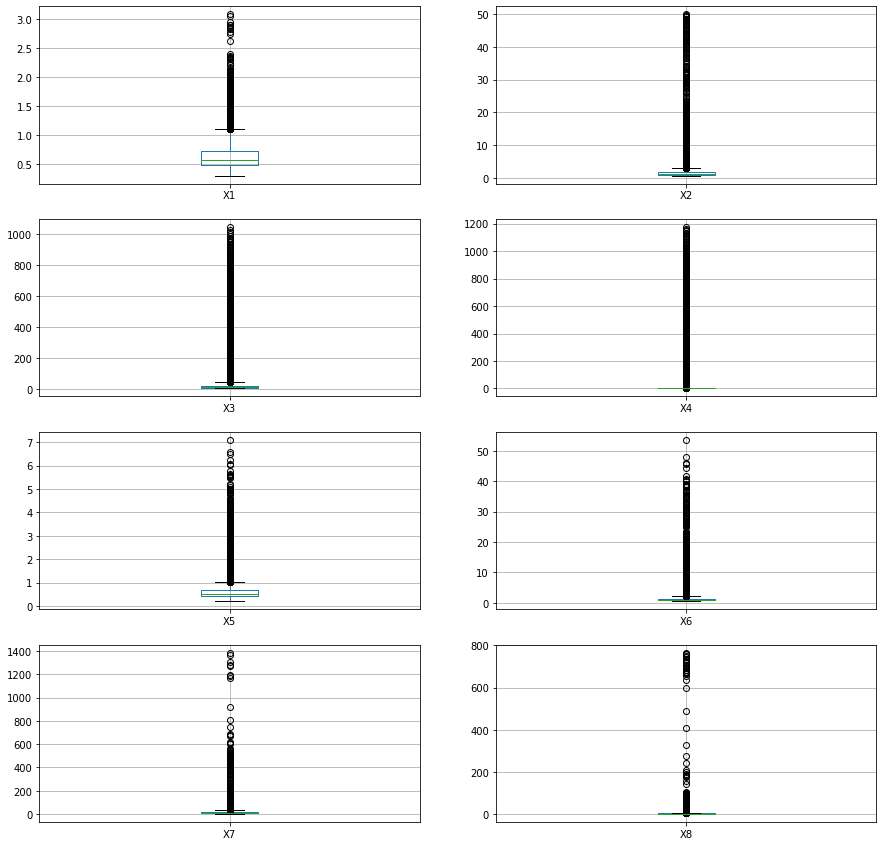

In [10]:
test = ['X1','X2','X3','X4','X5','X6','X7','X8']
# Show the images of boxplots! 
plt.subplots(4,2,figsize=(15,15))
for i in range (0,8):
    plt.subplot(4,2,i+1)
    df_anomalies.boxplot(column= test[i])

From what I can see, we definetely have an issue with scale! x3 has values up to like 3 or so, but x7 has values up to 1400!! we need to normalize :) 

This is kinda why I think that corelation would be the better metric in this case compared to covariance. 


Note below: I take the absolute value because i don't care if it is positive or negative corelation, i just care about the strength of the relationship. 

In [11]:
# the correlation values change if Sds_Armed is in the dataset. The question only asks for X1-X8 so I drop the value. 
df_anomalies = df_anomalies.drop(['Sds_Armed'],axis = 1)
corr_anomalies = df_anomalies.corr()
corr_anomalies

X1        X2        X3        X4        X5        X6  \
X1           1.000000  0.414073  0.124138  0.212963  0.550099  0.320750   
X2           0.414073  1.000000  0.392645  0.346214  0.168778  0.479871   
X3           0.124138  0.392645  1.000000  0.776113 -0.069084  0.025698   
X4           0.212963  0.346214  0.776113  1.000000 -0.053583  0.000340   
X5           0.550099  0.168778 -0.069084 -0.053583  1.000000  0.477138   
X6           0.320750  0.479871  0.025698  0.000340  0.477138  1.000000   
X7          -0.006689  0.105563  0.158619  0.020650  0.032577  0.353929   
X8           0.015945  0.105844  0.067604  0.057466  0.039234  0.325641   
Anomaly_Tag  0.368017  0.063553 -0.051786 -0.039113  0.323319  0.152556   

                   X7        X8  Anomaly_Tag  
X1          -0.006689  0.015945     0.368017  
X2           0.105563  0.105844     0.063553  
X3           0.158619  0.067604    -0.051786  
X4           0.020650  0.057466    -0.039113  
X5           0.032577  0.039234     0.323319  
X6           0.353929  0.325641     0.152556  
X7           1.000000  0.577892     0.010843  
X8           0.577892  1.000000     0.069587  
Anomaly_Tag  0.010843  0.069587     1.000000

In [12]:
#get absolute value 
#corr_anomalies = corr_anomalies.abs()

# sort them 
corr_anomalies = corr_anomalies.abs()
corr_anomalies = corr_anomalies["Anomaly_Tag"].sort_values()
corr_anomalies 

X7             0.010843
X4             0.039113
X3             0.051786
X2             0.063553
X8             0.069587
X6             0.152556
X5             0.323319
X1             0.368017
Anomaly_Tag    1.000000
Name: Anomaly_Tag, dtype: float64

My answer is that X1 is the worst (contributes the most to the anomalies) and that x7 is the best (doesn't contribute much to anomalies) 

## Question 4
Start by loading data from the .csv file generated in Q1.

In [13]:
df_normal = pd.read_csv(file_name_normal, index_col = 0)
df_normal.head()

X1       X2      X3      X4       X5       X6      X7      X8  \
622  0.42051  0.73265  6.0160  1.4258  0.22390  0.44638  4.9892  1.3106   
623  0.41743  0.72691  6.0102  1.4259  0.21750  0.44326  5.0469  1.3243   
624  0.41608  0.72337  6.0093  1.4254  0.21875  0.44661  5.0830  1.3227   
625  0.41517  0.72154  6.0002  1.4261  0.23488  0.46345  4.9672  1.3509   
626  0.41376  0.71773  5.9814  1.4257  0.25363  0.48208  4.8346  1.3580   

     Sds_Armed  Anomaly_Tag            experiment  
622          1            0  HEAT_ID_01_ALARM_OUT  
623          1            0  HEAT_ID_01_ALARM_OUT  
624          1            0  HEAT_ID_01_ALARM_OUT  
625          1            0  HEAT_ID_01_ALARM_OUT  
626          1            0  HEAT_ID_01_ALARM_OUT

Model all the X1 - X8 values using a guassian distribution. We will need average value and standard deviation!

In [14]:
#df_normal.std(axis=0)

# manually put in the values (this one takes less time but might as well)
Xstd = [0.486957,0.989620,13.900517,3.466298,0.779838,1.570947,18.187955,4.701613]

In [15]:
#df_normal.mean(axis=0)

# enter it manually cuz this takes A WHILE :P 
Xave = [0.497500,0.883802,7.763045,2.617440,0.477496,0.849776,7.395009,2.546401]

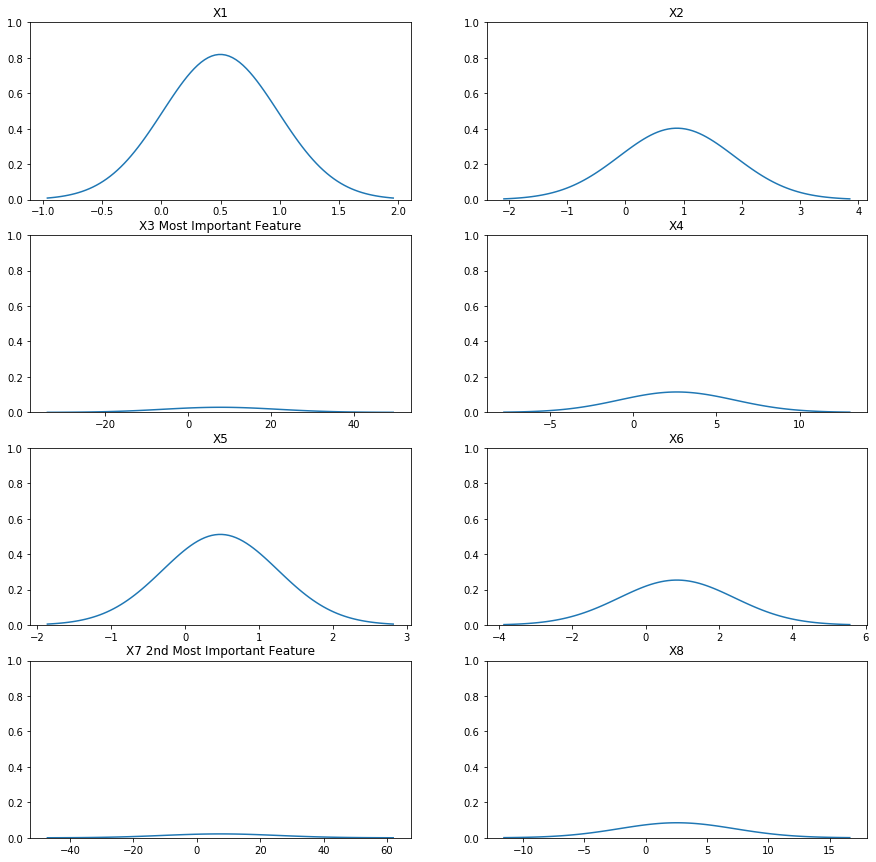

In [16]:
import warnings
warnings.filterwarnings('ignore') # hide mpl deprecation warnings

# Show the images 
plt.subplots(4,2,figsize=(15,15))

# i'm doing this for X3 and X7 
for i in range (0,8):
    plt.subplot(4,2,i+1)
    x = np.linspace(Xave[i] - 3*Xstd[i], Xave[i] + 3*Xstd[i], 100)
    plt.plot(x, stats.norm.pdf(x, Xave[i], Xstd[i]))
    #manually control the limits! 
    plt.ylim(0, 1) 
    #plt.xlim(-50,50)
    if i == 2:
        plt.subplot(4,2,i+1).set_title('X'+str(i+1)+' Most Important Feature')
    elif i == 6:
        plt.subplot(4,2,i+1).set_title('X'+str(i+1)+ ' 2nd Most Important Feature')
    else:
        plt.subplot(4,2,i+1).set_title('X'+str(i+1))

In [17]:
# 1) substract mean from data
# using some code from above 
df_normal= pd.read_csv(file_name_normal, index_col = 0)

test = ['X1','X2','X3','X4','X5','X6','X7','X8']

# drop anomaly tag, and sds armed and experiment
df_prob = df_normal.drop(['Sds_Armed','Anomaly_Tag','experiment'],axis=1)

i=0
Gaussian = stats.norm.pdf(df_prob[test[i]], Xave[i], Xstd[i])

for i in range(1,8):
    Test = stats.norm.pdf(df_prob[test[i]], Xave[i], Xstd[i])
    Gaussian = np.multiply(Gaussian,Test)
    
Gaussian = pd.DataFrame(Gaussian)
Gaussian.describe()

0
count  1.523560e+05
mean   2.029264e-07
std    6.272515e-08
min    0.000000e+00
25%    1.942618e-07
50%    2.206691e-07
75%    2.427190e-07
max    2.614460e-07

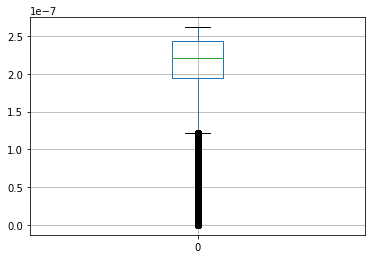

In [18]:
# show visually what is going on, I can see that our epsilon should be somewhere around 1.3e-7 
Gaussian.boxplot()

# Now time to perform PCA analysis, steps are:  
## attempt 1
#### 1) substract mean from data 
#### 2) divide data by variance (aka std^2) --> I have ignored this part, The lecture slides does NOT do this! 
#### 3) find the covariance matrix 
#### 4) find eigenvalues + eigenvector of the covariance matrix 
#### 5) Find out which eigenvalues contain the most information, keep 2 eigen vectors after this analysis
#### 6) multiply standardized dataset by eigenvectors transposed! :) done!!

In [19]:
# 1) substract mean from data
# using some code from above 
df_normal= pd.read_csv(file_name_normal, index_col = 0)

#issue with indexing in this dataframe?? Int64Index: 45626 entries, 745 to 3272
df_normal.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 152356 entries, 622 to 2946
Data columns (total 11 columns):
X1             152356 non-null float64
X2             152356 non-null float64
X3             152356 non-null float64
X4             152356 non-null float64
X5             152356 non-null float64
X6             152356 non-null float64
X7             152356 non-null float64
X8             152356 non-null float64
Sds_Armed      152356 non-null int64
Anomaly_Tag    152356 non-null int64
experiment     152356 non-null object
dtypes: float64(8), int64(2), object(1)
memory usage: 13.9+ MB


In [20]:
# drop anomaly tag, and sds armed and experiment
df_pca = df_normal.drop(['Sds_Armed','Anomaly_Tag','experiment'],axis=1)

df_pca.head()

X1       X2      X3      X4       X5       X6      X7      X8
622  0.42051  0.73265  6.0160  1.4258  0.22390  0.44638  4.9892  1.3106
623  0.41743  0.72691  6.0102  1.4259  0.21750  0.44326  5.0469  1.3243
624  0.41608  0.72337  6.0093  1.4254  0.21875  0.44661  5.0830  1.3227
625  0.41517  0.72154  6.0002  1.4261  0.23488  0.46345  4.9672  1.3509
626  0.41376  0.71773  5.9814  1.4257  0.25363  0.48208  4.8346  1.3580

In [21]:
# substract the means finally 
X = ['X1','X2','X3','X4','X5','X6','X7','X8']
for i in range (0,8):
    df_pca[X[i]] = df_pca[X[i]]-Xave[i]
df_pca.describe()

X1            X2            X3            X4            X5  \
count  1.523560e+05  1.523560e+05  1.523560e+05  1.523560e+05  1.523560e+05   
mean  -3.040117e-07  3.869293e-07 -6.642337e-08  3.046155e-07 -3.511250e-07   
std    4.869565e-01  9.896203e-01  1.390052e+01  3.466298e+00  7.798378e-01   
min   -4.549480e-01 -7.894190e-01 -6.724645e+00 -2.078800e+00 -3.040360e-01   
25%   -1.504000e-01 -2.346270e-01 -3.535745e+00 -1.075940e+00 -1.500060e-01   
50%   -5.708000e-02 -9.208200e-02 -2.781545e+00 -4.624400e-01 -6.750600e-02   
75%    3.657000e-02  3.344050e-02 -1.946745e+00  2.006600e-01  3.207400e-02   
max    1.508550e+01  2.637420e+01  3.346570e+02  8.339556e+01  5.257550e+01   

                 X6            X7            X8  
count  1.523560e+05  1.523560e+05  1.523560e+05  
mean   2.248287e-07 -1.549266e-07 -6.429678e-08  
std    1.570947e+00  1.818795e+01  4.701613e+00  
min   -5.038560e-01 -6.453249e+00 -2.297861e+00  
25%   -2.437960e-01 -3.304709e+00 -1.054101e+00  
50%   -1.047410e-01 -2.614909e+00 -5.115010e-01  
75%    3.255400e-02 -1.915709e+00  1.506990e-01  
max    9.532422e+01  7.146250e+02  1.792336e+02

#### Mean is roughly zero now !

In [22]:
# commented out to ignore !

# # divide through by standard deviation 
# for i in range (0,8):
#     df_pca[X[i]] = df_pca[X[i]]/(Xstd[i])
# df_pca.describe()

#### standard deviation is now  is roughly 1 now !

In [23]:
# find the covariance matrix 
df_cov = df_pca.cov()
df_cov

X1        X2          X3         X4        X5         X6  \
X1  0.237127  0.469539    3.827697   1.283360  0.141805   0.280584   
X2  0.469539  0.979348    9.231350   2.875613  0.274458   0.581017   
X3  3.827697  9.231350  193.224368  42.086533  1.956296   5.183251   
X4  1.283360  2.875613   42.086533  12.015223  0.671428   1.567032   
X5  0.141805  0.274458    1.956296   0.671428  0.608147   1.190327   
X6  0.280584  0.581017    5.183251   1.567032  1.190327   2.467874   
X7  2.034031  5.073584  112.064358  22.959798  8.644799  19.680881   
X8  0.717838  1.619127   24.372733   6.651358  2.807354   6.138411   

            X7         X8  
X1    2.034031   0.717838  
X2    5.073584   1.619127  
X3  112.064358  24.372733  
X4   22.959798   6.651358  
X5    8.644799   2.807354  
X6   19.680881   6.138411  
X7  330.801704  75.317589  
X8   75.317589  22.105169

In [24]:
# calculate the eigenvalues and eigenvectors of covariance matrix 
eigenvalue , eigenvector = LA.eig(df_cov.to_numpy())

In [25]:
# show all the eigenvalues 
pd.DataFrame(eigenvalue)

0
0  414.758996
1  137.993248
2    6.454844
3    2.075942
4    0.887676
5    0.239050
6    0.005166
7    0.024037

In [26]:
# show all the eigenvectors
pd.DataFrame(eigenvector)

0         1         2         3         4         5         6  \
0  0.009267  0.017978 -0.082560  0.138688  0.164519  0.428886 -0.840929   
1  0.022562  0.042548 -0.154274  0.267035  0.294229  0.760702  0.468519   
2  0.473584  0.851522  0.095853 -0.201484  0.008310  0.027490 -0.002579   
3  0.101633  0.193426 -0.431515  0.800941 -0.086760 -0.341820 -0.012693   
4  0.021645 -0.019050 -0.162057 -0.099061  0.412028 -0.154966  0.237257   
5  0.049957 -0.038525 -0.311960 -0.207571  0.740480 -0.277322 -0.129760   
6  0.850689 -0.469001  0.204747  0.114811  0.033893 -0.010535 -0.000026   
7  0.195340 -0.116420 -0.780056 -0.401591 -0.399423  0.136965  0.005644   

          7  
0 -0.235306  
1  0.133507  
2 -0.003545  
3  0.003925  
4 -0.844405  
5  0.462125  
6 -0.001913  
7 -0.013996

# Let us visualize the information in each Eigenvector / Eigenvalue pair !!

In [27]:
# find the percent information for each eigenvector / eigenvalue combo 
Sum = np.sum(eigenvalue)
eigenPercentInfo = eigenvalue/Sum*100

i = 0
print('eigenvalue' + str(i+1) + '=' +  ' ' + str(eigenvalue[i]) )
print('eigenvector' + str(i+1) + '=' + ' ' + str(eigenvector[:,i]) )
print('percent info of eigenvector'+str(i+1)+'= '+str(eigenPercentInfo[i])+'%' )

eigenvalue1= 414.7589960376646
eigenvector1= [0.00926706 0.02256206 0.47358423 0.10163294 0.02164454 0.049957
 0.85068908 0.19533999]
percent info of eigenvector1= 73.74293498944256%


In [28]:
i = 1
print('eigenvalue' + str(i+1) + '=' +  ' ' + str(eigenvalue[i]) )
print('eigenvector' + str(i+1) + '=' + ' ' + str(eigenvector[:,i]) )
print('percent info of eigenvector'+str(i+1)+'= '+str(eigenPercentInfo[i])+'%' )

eigenvalue2= 137.99324781470935
eigenvector2= [ 0.0179777   0.04254847  0.85152232  0.19342551 -0.01904997 -0.0385252
 -0.46900103 -0.1164203 ]
percent info of eigenvector2= 24.534795386711888%


In [29]:
i = 2
print('eigenvalue' + str(i+1) + '=' +  ' ' + str(eigenvalue[i]) )
print('eigenvector' + str(i+1) + '=' + ' ' + str(eigenvector[:,i]) )
print('percent info of eigenvector'+str(i+1)+'= '+str(eigenPercentInfo[i])+'%' )

eigenvalue3= 6.454843777654955
eigenvector3= [-0.08255997 -0.15427358  0.09585301 -0.43151515 -0.16205676 -0.3119602
  0.20474683 -0.78005613]
percent info of eigenvector3= 1.147652322457139%


In [30]:
i = 3
print('eigenvalue' + str(i+1) + '=' +  ' ' + str(eigenvalue[i]) )
print('eigenvector' + str(i+1) + '=' + ' ' + str(eigenvector[:,i]) )
print('percent info of eigenvector'+str(i+1)+'= '+str(eigenPercentInfo[i])+'%' )

eigenvalue4= 2.0759418292119163
eigenvector4= [ 0.13868757  0.26703499 -0.20148441  0.80094125 -0.09906115 -0.20757069
  0.11481068 -0.40159061]
percent info of eigenvector4= 0.36909637841715903%


In [31]:
i = 4
print('eigenvalue' + str(i+1) + '=' +  ' ' + str(eigenvalue[i]) )
print('eigenvector' + str(i+1) + '=' + ' ' + str(eigenvector[:,i]) )
print('percent info of eigenvector'+str(i+1)+'= '+str(eigenPercentInfo[i])+'%' )

eigenvalue5= 0.8876763461995747
eigenvector5= [ 0.16451937  0.29422935  0.00830986 -0.08676028  0.41202846  0.74048023
  0.03389281 -0.39942324]
percent info of eigenvector5= 0.15782625504165482%


In [32]:
i = 5
print('eigenvalue' + str(i+1) + '=' +  ' ' + str(eigenvalue[i]) )
print('eigenvector' + str(i+1) + '=' + ' ' + str(eigenvector[:,i]) )
print('percent info of eigenvector'+str(i+1)+'= '+str(eigenPercentInfo[i])+'%' )

eigenvalue6= 0.239049685217434
eigenvector6= [ 0.42888638  0.76070184  0.02748972 -0.34182048 -0.15496553 -0.27732217
 -0.0105354   0.13696482]
percent info of eigenvector6= 0.042502334041321456%


In [33]:
i = 6
print('eigenvalue' + str(i+1) + '=' +  ' ' + str(eigenvalue[i]) )
print('eigenvector' + str(i+1) + '=' + ' ' + str(eigenvector[:,i]) )
print('percent info of eigenvector'+str(i+1)+'= '+str(eigenPercentInfo[i])+'%' )

eigenvalue7= 0.00516631701135957
eigenvector7= [-8.40928960e-01  4.68519201e-01 -2.57888182e-03 -1.26928081e-02
  2.37257341e-01 -1.29759729e-01 -2.56661513e-05  5.64361356e-03]
percent info of eigenvector7= 0.0009185560365011175%


In [34]:
i = 7
print('eigenvalue' + str(i+1) + '=' +  ' ' + str(eigenvalue[i]) )
print('eigenvector' + str(i+1) + '=' + ' ' + str(eigenvector[:,i]) )
print('percent info of eigenvector'+str(i+1)+'= '+str(eigenPercentInfo[i])+'%' )

eigenvalue8= 0.024037391668098443
eigenvector8= [-0.23530591  0.13350698 -0.00354478  0.00392473 -0.84440529  0.46212466
 -0.00191296 -0.01399604]
percent info of eigenvector8= 0.004273777851789818%


# Analysis: 
#### Eigenvectors 1 and 2 contain 84.15% of the information, so lets use those!  

In [35]:
# multiply standardized dataset by eigenvectors transposed!

#show my eigenvectors! 
pd.DataFrame(np.transpose(eigenvector[:,0:2]))

0         1         2         3         4         5         6  \
0  0.009267  0.022562  0.473584  0.101633  0.021645  0.049957  0.850689   
1  0.017978  0.042548  0.851522  0.193426 -0.019050 -0.038525 -0.469001   

         7  
0  0.19534  
1 -0.11642

In [36]:
pd.DataFrame(np.transpose(df_pca.to_numpy()))

0         1         2         3         4         5         6       \
0 -0.076990 -0.080070 -0.081420 -0.082330 -0.083740 -0.090030 -0.097810   
1 -0.151152 -0.156892 -0.160432 -0.162262 -0.166072 -0.188372 -0.208592   
2 -1.747045 -1.752845 -1.753745 -1.762845 -1.781645 -1.968545 -2.299245   
3 -1.191640 -1.191540 -1.192040 -1.191340 -1.191740 -1.200140 -1.213640   
4 -0.253596 -0.259996 -0.258746 -0.242616 -0.223866 -0.216966 -0.217886   
5 -0.403396 -0.406516 -0.403166 -0.386326 -0.367696 -0.368806 -0.375176   
6 -2.405809 -2.348109 -2.312009 -2.427809 -2.560409 -2.706209 -2.719509   
7 -1.235801 -1.222101 -1.223701 -1.195501 -1.188401 -1.154501 -1.146301   

     7         8         9       ...    152346    152347    152348    152349  \
0 -0.101320 -0.103290 -0.104720  ...  0.697100  0.549000  0.416640  0.309410   
1 -0.213122 -0.216002 -0.218222  ...  1.453098  1.116598  0.838998  0.618598   
2 -2.365845 -2.373945 -2.381045  ...  5.002955  3.351955  1.623555 -0.282645   
3 -1.216340 -1.217340 -1.217840  ...  2.159360  1.669460  1.122660  0.650660   
4 -0.209406 -0.209736 -0.221016  ...  0.533404  0.456384  0.376534  0.347254   
5 -0.360266 -0.354446 -0.366946  ...  0.526924  0.468524  0.482024  0.973024   
6 -2.812209 -2.851109 -2.752009  ... -5.164309 -5.311509 -5.314109 -4.096409   
7 -1.142401 -1.153501 -1.171801  ... -1.190701 -1.162201 -1.096101 -1.020601   

     152350     152351     152352     152353     152354     152355  
0  0.276400   0.276500   0.271920   0.264540   0.262230   0.263150  
1  0.713198   0.817298   0.810198   0.790698   0.777398   0.775198  
2 -0.695845  -0.588845  -0.724945  -0.862645  -0.994945  -1.043945  
3  0.466660   0.406960   0.358260   0.308560   0.266860   0.249660  
4  0.563904   0.765404   0.789104   0.771004   0.728104   0.679104  
5  4.832724   7.362624   7.467224   7.407224   7.273024   6.689624  
6  6.051991  14.074991  14.748991  14.709991  14.582991  13.342991  
7 -0.925401  -0.910201  -0.941701  -0.985701  -1.048201  -1.112601  

[8 rows x 152356 columns]

In [37]:
# Answer = (EigenVector)T * (normalizedData)T
df_pca_ans = pd.DataFrame(np.transpose(np.matmul(np.transpose(eigenvector[:,0:2]),np.transpose(df_pca.to_numpy()))))
df_pca_ans.columns =['Feature1','Feature2']

In [38]:
df_pca_ans.head()

Feature1  Feature2
0 -3.266245 -0.433386
1 -3.217673 -0.467019
2 -3.187651 -0.484954
3 -3.283750 -0.442591
4 -3.402871 -0.398576

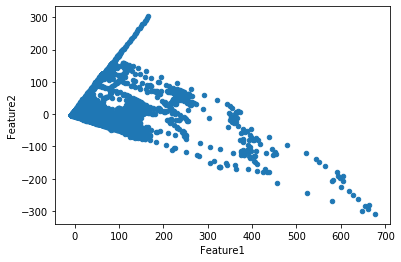

In [39]:
# plot my answer
df_pca_ans.plot(x='Feature1',y='Feature2',kind='scatter')

# Question 5 
## multivariate depedant gaussian
### goal: find the probability for each row of data ! (a curve is impossible with 8 values) 

In [40]:
# 1) substract mean from data
# using some code from above 
df_normal= pd.read_csv(file_name_normal, index_col = 0)

#issue with indexing in this dataframe?? Int64Index: 45626 entries, 745 to 3272
df_normal = df_normal.drop(['Sds_Armed','Anomaly_Tag','experiment'],axis=1)
df_normal.describe()

X1             X2             X3             X4  \
count  152356.000000  152356.000000  152356.000000  152356.000000   
mean        0.497500       0.883802       7.763045       2.617440   
std         0.486957       0.989620      13.900517       3.466298   
min         0.042552       0.094383       1.038400       0.538640   
25%         0.347100       0.649175       4.227300       1.541500   
50%         0.440420       0.791720       4.981500       2.155000   
75%         0.534070       0.917243       5.816300       2.818100   
max        15.583000      27.258000     342.420000      86.013000   

                  X5             X6             X7             X8  
count  152356.000000  152356.000000  152356.000000  152356.000000  
mean        0.477496       0.849776       7.395009       2.546401  
std         0.779838       1.570947      18.187955       4.701613  
min         0.173460       0.345920       0.941760       0.248540  
25%         0.327490       0.605980       4.090300       1.492300  
50%         0.409990       0.745035       4.780100       2.034900  
75%         0.509570       0.882330       5.479300       2.697100  
max        53.053000      96.174000     722.020000     181.780000

In [41]:
df_normal_numpy = df_normal.to_numpy()
df_normal.head()

X1       X2      X3      X4       X5       X6      X7      X8
622  0.42051  0.73265  6.0160  1.4258  0.22390  0.44638  4.9892  1.3106
623  0.41743  0.72691  6.0102  1.4259  0.21750  0.44326  5.0469  1.3243
624  0.41608  0.72337  6.0093  1.4254  0.21875  0.44661  5.0830  1.3227
625  0.41517  0.72154  6.0002  1.4261  0.23488  0.46345  4.9672  1.3509
626  0.41376  0.71773  5.9814  1.4257  0.25363  0.48208  4.8346  1.3580

In [42]:
# create 8 values of X for the multivariate solution 
x = np.linspace(-60,60,1000)
x = np.tile(x,(8,1))

In [43]:
describe = df_normal.describe()
describe = describe.to_numpy()
mean = describe[1,:]
pd.DataFrame(mean)

0
0  0.497500
1  0.883802
2  7.763045
3  2.617440
4  0.477496
5  0.849776
6  7.395009
7  2.546401

In [44]:
df_cov = df_normal.cov()
df_cov

X1        X2          X3         X4        X5         X6  \
X1  0.237127  0.469539    3.827697   1.283360  0.141805   0.280584   
X2  0.469539  0.979348    9.231350   2.875613  0.274458   0.581017   
X3  3.827697  9.231350  193.224368  42.086533  1.956296   5.183251   
X4  1.283360  2.875613   42.086533  12.015223  0.671428   1.567032   
X5  0.141805  0.274458    1.956296   0.671428  0.608147   1.190327   
X6  0.280584  0.581017    5.183251   1.567032  1.190327   2.467874   
X7  2.034031  5.073584  112.064358  22.959798  8.644799  19.680881   
X8  0.717838  1.619127   24.372733   6.651358  2.807354   6.138411   

            X7         X8  
X1    2.034031   0.717838  
X2    5.073584   1.619127  
X3  112.064358  24.372733  
X4   22.959798   6.651358  
X5    8.644799   2.807354  
X6   19.680881   6.138411  
X7  330.801704  75.317589  
X8   75.317589  22.105169

In [45]:
# find the probability of having the first row of X1 through X8. 

rv = stats.multivariate_normal.pdf(df_normal_numpy[0,:],mean,df_cov)
rv

0.00010898186251311261

In [46]:
# do it for ALL the values in the numpy array (multi stands for multivariat guassian distrubution!)
size , num = np.shape(df_normal_numpy)
df_normal_multi_numpy = np.zeros((size,num+1))
df_normal_multi_numpy[:,:-1] = df_normal_numpy

# show the array where we will calculate percentages in column 8 ! 
pd.DataFrame(df_normal_multi_numpy)

0        1       2       3        4        5        6       7  \
0       0.42051  0.73265  6.0160  1.4258  0.22390  0.44638   4.9892  1.3106   
1       0.41743  0.72691  6.0102  1.4259  0.21750  0.44326   5.0469  1.3243   
2       0.41608  0.72337  6.0093  1.4254  0.21875  0.44661   5.0830  1.3227   
3       0.41517  0.72154  6.0002  1.4261  0.23488  0.46345   4.9672  1.3509   
4       0.41376  0.71773  5.9814  1.4257  0.25363  0.48208   4.8346  1.3580   
...         ...      ...     ...     ...      ...      ...      ...     ...   
152351  0.77400  1.70110  7.1742  3.0244  1.24290  8.21240  21.4700  1.6362   
152352  0.76942  1.69400  7.0381  2.9757  1.26660  8.31700  22.1440  1.6047   
152353  0.76204  1.67450  6.9004  2.9260  1.24850  8.25700  22.1050  1.5607   
152354  0.75973  1.66120  6.7681  2.8843  1.20560  8.12280  21.9780  1.4982   
152355  0.76065  1.65900  6.7191  2.8671  1.15660  7.53940  20.7380  1.4338   

          8  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
...     ...  
152351  0.0  
152352  0.0  
152353  0.0  
152354  0.0  
152355  0.0  

[152356 rows x 9 columns]

In [47]:
# calculate the probability via multivariate normal guassian distrubtion for every row of data :) 
for i in range(0,size):
    df_normal_multi_numpy[i,num] = stats.multivariate_normal.pdf(df_normal_numpy[i,:],mean,df_cov)

# put into the dataframe! 
df_normal['ProbabilityDependant'] = df_normal_multi_numpy[:,num]

In [48]:
# now to show the probability for every single row of data !!
df_normal.head()


X1       X2      X3      X4       X5       X6      X7      X8  \
622  0.42051  0.73265  6.0160  1.4258  0.22390  0.44638  4.9892  1.3106   
623  0.41743  0.72691  6.0102  1.4259  0.21750  0.44326  5.0469  1.3243   
624  0.41608  0.72337  6.0093  1.4254  0.21875  0.44661  5.0830  1.3227   
625  0.41517  0.72154  6.0002  1.4261  0.23488  0.46345  4.9672  1.3509   
626  0.41376  0.71773  5.9814  1.4257  0.25363  0.48208  4.8346  1.3580   

     ProbabilityDependant  
622              0.000109  
623              0.000108  
624              0.000109  
625              0.000111  
626              0.000113

In [49]:
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152356 entries, 622 to 2946
Data columns (total 9 columns):
X1                      152356 non-null float64
X2                      152356 non-null float64
X3                      152356 non-null float64
X4                      152356 non-null float64
X5                      152356 non-null float64
X6                      152356 non-null float64
X7                      152356 non-null float64
X8                      152356 non-null float64
ProbabilityDependant    152356 non-null float64
dtypes: float64(9)
memory usage: 11.6 MB


## Question 6 


In [50]:
df_probability = pd.read_csv(file_name_normal, index_col = 0)
df_probability.head()

df_probability = df_probability.drop(['Sds_Armed','experiment','X1','X2','X3','X4','X5','X6','X7','X8'],axis=1)
df_probability.describe()
df_probability['ProbabilityDependant'] = df_normal_multi_numpy[:,num]
df_probability['ProbabilityIndependant'] = Gaussian
df_probability.describe()

Anomaly_Tag  ProbabilityDependant  ProbabilityIndependant
count     152356.0         152356.000000            1.523560e+05
mean           0.0              0.000090            1.956775e-07
std            0.0              0.000039            2.974655e-08
min            0.0              0.000000            2.002240e-29
25%            0.0              0.000077            1.821808e-07
50%            0.0              0.000103            1.905435e-07
75%            0.0              0.000118            2.129061e-07
max            0.0              0.000140            2.513473e-07

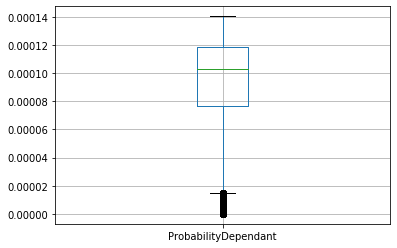

In [51]:
df_probability.boxplot(column = 'ProbabilityDependant')
epsilonDependant = 0.000077

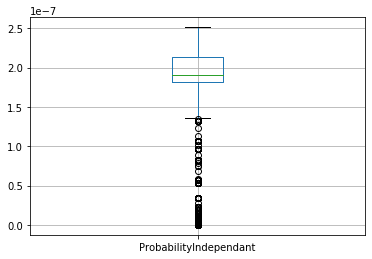

In [52]:
df_probability.boxplot(column = 'ProbabilityIndependant')
epsilonIndependant = 1.821808e-07

In [53]:
# 1) substract mean from data
# using some code from above 
df_findAnom= pd.read_csv(file_name_anomalies, index_col = 0)

test = ['X1','X2','X3','X4','X5','X6','X7','X8']

# drop anomaly tag, and sds armed and experiment
df_findAnom = df_findAnom.drop(['Sds_Armed','experiment'],axis=1)

i=0
Gaussian2 = stats.norm.pdf(df_findAnom[test[i]], Xave[i], Xstd[i])

for i in range(1,8):
    Test = stats.norm.pdf(df_findAnom[test[i]], Xave[i], Xstd[i])
    Gaussian2 = np.multiply(Gaussian2,Test)
    
df_findAnom['ProbabilityIndependant'] = Gaussian2

In [54]:
df_findAnom['MyAnomaly'] = np.where(df_findAnom['ProbabilityIndependant']<=epsilonIndependant, 1, 0)